In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas_datareader as pdr
%matplotlib inline

# 获取自2015年来，谷歌、脸书、苹果、微软、亚马逊 五家公司的当日关闭价格

In [8]:
start = datetime(2015,1,1)
company = ['GOOG','FB','AAPL','MSFT','AMZN']
top5 = pdr.get_data_yahoo(company,start=start)['Adj Close']

In [9]:
top5.to_csv('top5.csv')

In [11]:
top5.tail()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2018-11-01,221.447327,1665.530029,151.750000,1070.000000,105.919998
2018-11-02,206.758575,1665.530029,150.350006,1057.790039,106.160004
2018-11-05,200.889053,1627.800049,148.679993,1040.089966,107.510002
2018-11-06,203.061493,1642.810059,149.940002,1055.810059,107.720001
2018-11-07,209.219986,1755.489990,151.529999,1093.390015,111.959999


## daily return
* 每天股价变化

In [20]:
top5_dr = top5.pct_change()

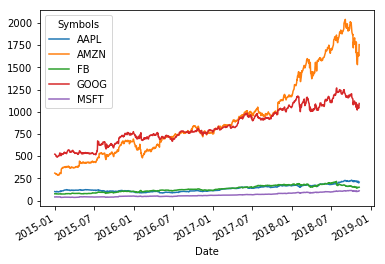

In [22]:
top5.plot()

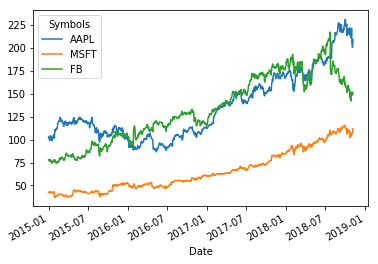

In [24]:
top5[['AAPL','MSFT','FB']].plot()

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


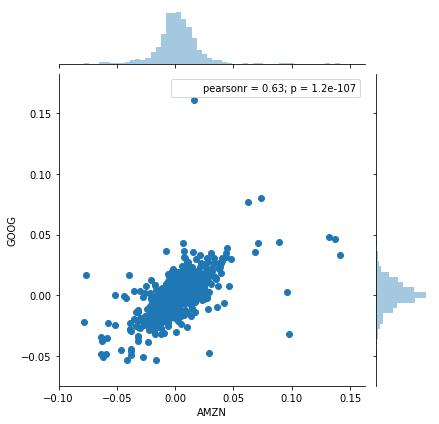

In [29]:
sns.jointplot('AMZN','GOOG',top5_dr,kind='scatter')

# 散点图矩阵

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AE22D30>,
      dtype=object)

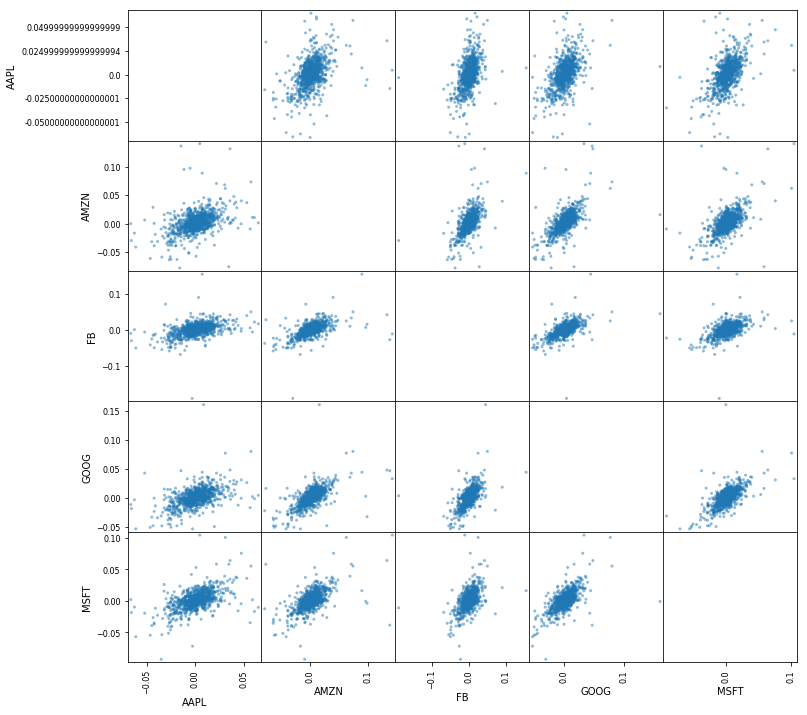

In [28]:
pd.plotting.scatter_matrix(top5_dr,diagonal='scatter',figsize=(12,12))

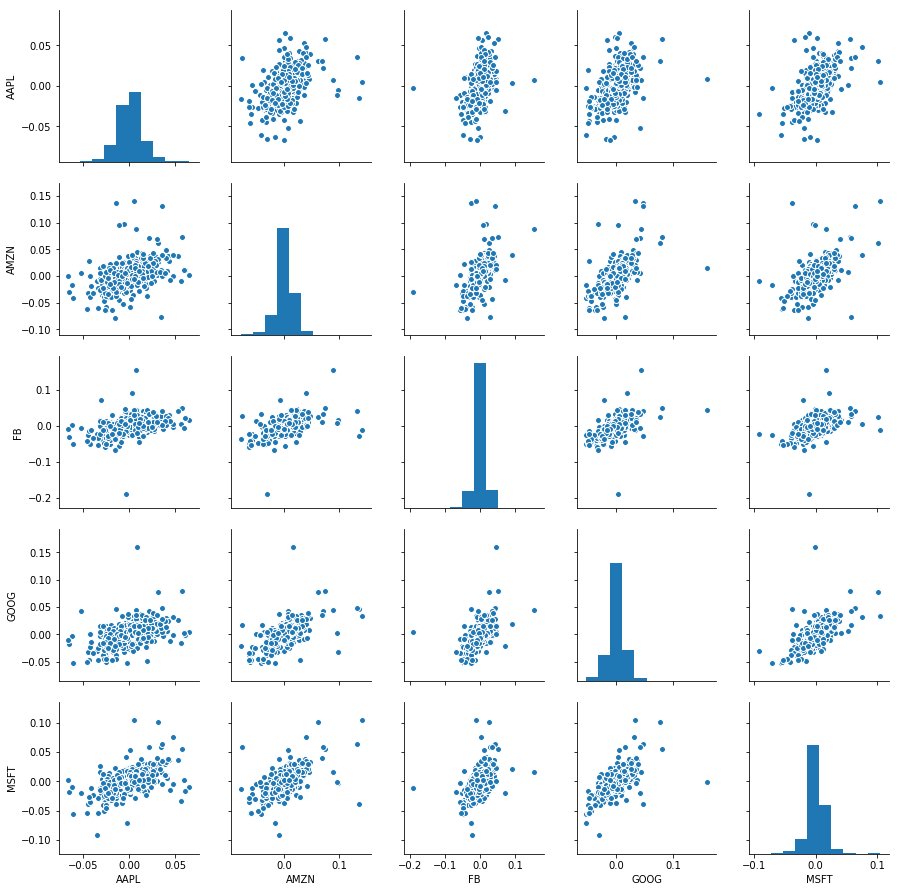

In [31]:
sns.pairplot(top5_dr.dropna())

# 风险分析
## 分位数
* quantile()

In [32]:
top5_dr.quantile(0.05)

Symbols
AAPL   -0.023778
AMZN   -0.024170
FB     -0.026037
GOOG   -0.022289
MSFT   -0.020279
Name: 0.05, dtype: float64

In [38]:
top5_dr['MSFT'].quantile(0.05)

-0.020279301560599983

* 有(1-0.05)%的信心，让微软亏损2.02%

In [42]:
import pandas_datareader as pdr

# 获取唯品会股价信息

In [44]:
vips = pdr.get_data_yahoo('VIPS')

In [45]:
vips.to_csv('vips.csv')

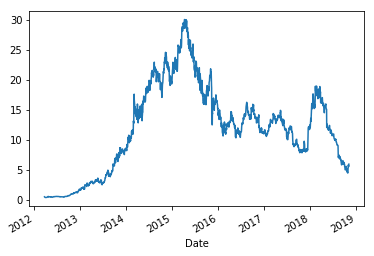

In [48]:
vips['Adj Close'].plot()

In [81]:
vips['Adj Close'].pct_change().quantile(0.2)

-0.022661156312105767

* 有80%信心，亏损2.2661156312105767%

In [54]:
alibaba = pd.read_csv('20181108BABA.csv',index_col='Date')

In [71]:
alibaba.index = pd.DatetimeIndex(alibaba.index)

In [73]:
alibaba.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2014-09-19 to 2018-11-07
Data columns (total 6 columns):
High         1043 non-null float64
Low          1043 non-null float64
Open         1043 non-null float64
Close        1043 non-null float64
Volume       1043 non-null int64
Adj Close    1043 non-null float64
dtypes: float64(5), int64(1)
memory usage: 57.0 KB


In [85]:
alibaba['Adj Close'].pct_change().quantile(0.1)

-0.02405533379432194

* 90%概率，亏损2.41% 

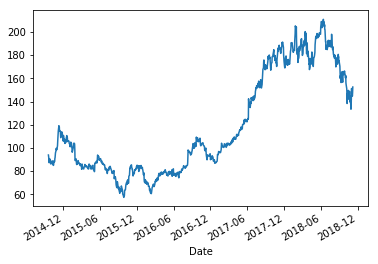

In [75]:
alibaba['Adj Close'].plot()